# EDA on factors affect presence of heart disease.
**Group 12**  
**2022/11/17**

In this notebook, we are going to perform a explanatory data analysis to the data we have chosen.

$\bullet$ [Link](#Link)  
$\bullet$ [Summary](#Summary)  
$\bullet$ [Introduction](#Introduction)  
$\bullet$ [Data](#Data)  
$\bullet$ [Methods](#Methods)  
$\bullet$ [Results](#Results)  
$\bullet$ [Reference](#Reference)  

### Link

https://github.com/UBC-MDS/group12

## Summary

From the 5 numeric variables and 8 categorical variables in the data, we want to know which factor is likely associated with presence of heart disease, which is the target column in the data. By comparing the summary statistics, correlation between variables, visualizing the distribution of variables and examining the count of each categorical variables, we will further explore age, ST depression induced by exercise relative to rest(oldpeak) and maximum heart rate achieved(thalach) as the three numeric feature of interest, and sex, chest pain type, number of major vessels, exercise induced angina

## Introduction  
Nowadays, heart disease is one of the leading cause of death for people all around the world. In 2019, about 660,000 people in the U.S. die from heart disease(Center for Disease Control and Prevention 2019). Meanwhile, 805,000 people in the U.S. have a heart attack. Note that heart disease is highly related to the probability of heart attack since heart's rhythm and its ability to pump blood to the rest of the body will be influenced after the heart attack, it is beneficial to find the factors that are correlated to increase the heart attack probability.  
Here, we use the explanatory data analysis to take a look at both the numeric and categorical variables which is probably related to the probability of heart attack. It is important since we cannot waste time in making hypothesis testing or prediction on every variable, especially those with nearly zero impact on the probability.  

## Data

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
import pandas as pd
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')
data=pd.read_csv("../data/raw/processed.cleveland.csv",
                names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"],skiprows=1)
data.loc[(data.target != 0),'target']=1
data.loc[(data.ca == "?"),'ca']=np.nan
data.loc[(data.thal == "?"),'thal']=np.nan
data.dropna()
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


## Methods  
At the very beginning, it is beneficial for us to look at the information of each factor in a table. Then, We take a look at the correlation table of each numeric factor to the target and then choose our numeric factors with relatively high absolute value of correlation. By plotting the histogram of the two factors, we find them have enough counts on every values, which helps us to do hypothesis test or making prediction.  
Then, we can use graphical method to analyze the factor to find whether it is related to the probability of heart attack. From all the plots, we can prove that the two factors we select indeed make a great influence on the heart attack probability and we plot them below.  

## Examining Numeric Features

In [11]:
num_cols = ["age", "trestbps", "chol", 'thalach','oldpeak']
    

In [13]:
data.query("target==0")[num_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,164.000000,164.000000,164.000000,164.000000,164.000000
mean,52.585366,129.250000,242.640244,158.378049,0.586585
std,9.511957,16.204739,53.456580,19.199080,0.781734
min,29.000000,94.000000,126.000000,96.000000,0.000000
25%,44.750000,120.000000,208.750000,148.750000,0.000000
50%,52.000000,130.000000,234.500000,161.000000,0.200000
75%,59.000000,140.000000,267.250000,172.000000,1.025000
max,76.000000,180.000000,564.000000,202.000000,4.200000


In [14]:
data.query("target==1")[num_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,56.625899,134.568345,251.474820,139.258993,1.574101
std,7.938416,18.769019,49.486835,22.593233,1.302580
min,35.000000,100.000000,131.000000,71.000000,0.000000
25%,52.000000,120.000000,217.500000,125.000000,0.550000
50%,58.000000,130.000000,249.000000,142.000000,1.400000
75%,62.000000,145.000000,283.500000,156.500000,2.500000
max,77.000000,200.000000,409.000000,195.000000,6.200000


## Comparing the distribution of numeric values between the two groups

The following table shows the difference in mean values between the two groups.

In [16]:
data.query("target==0")[num_cols].mean() - data.query("target==1")[num_cols].mean()

age         -4.040533
trestbps    -5.318345
chol        -8.834576
thalach     19.119056
oldpeak     -0.987515
dtype: float64

Next, we visualized the distribution of numeric variables of the two groups.

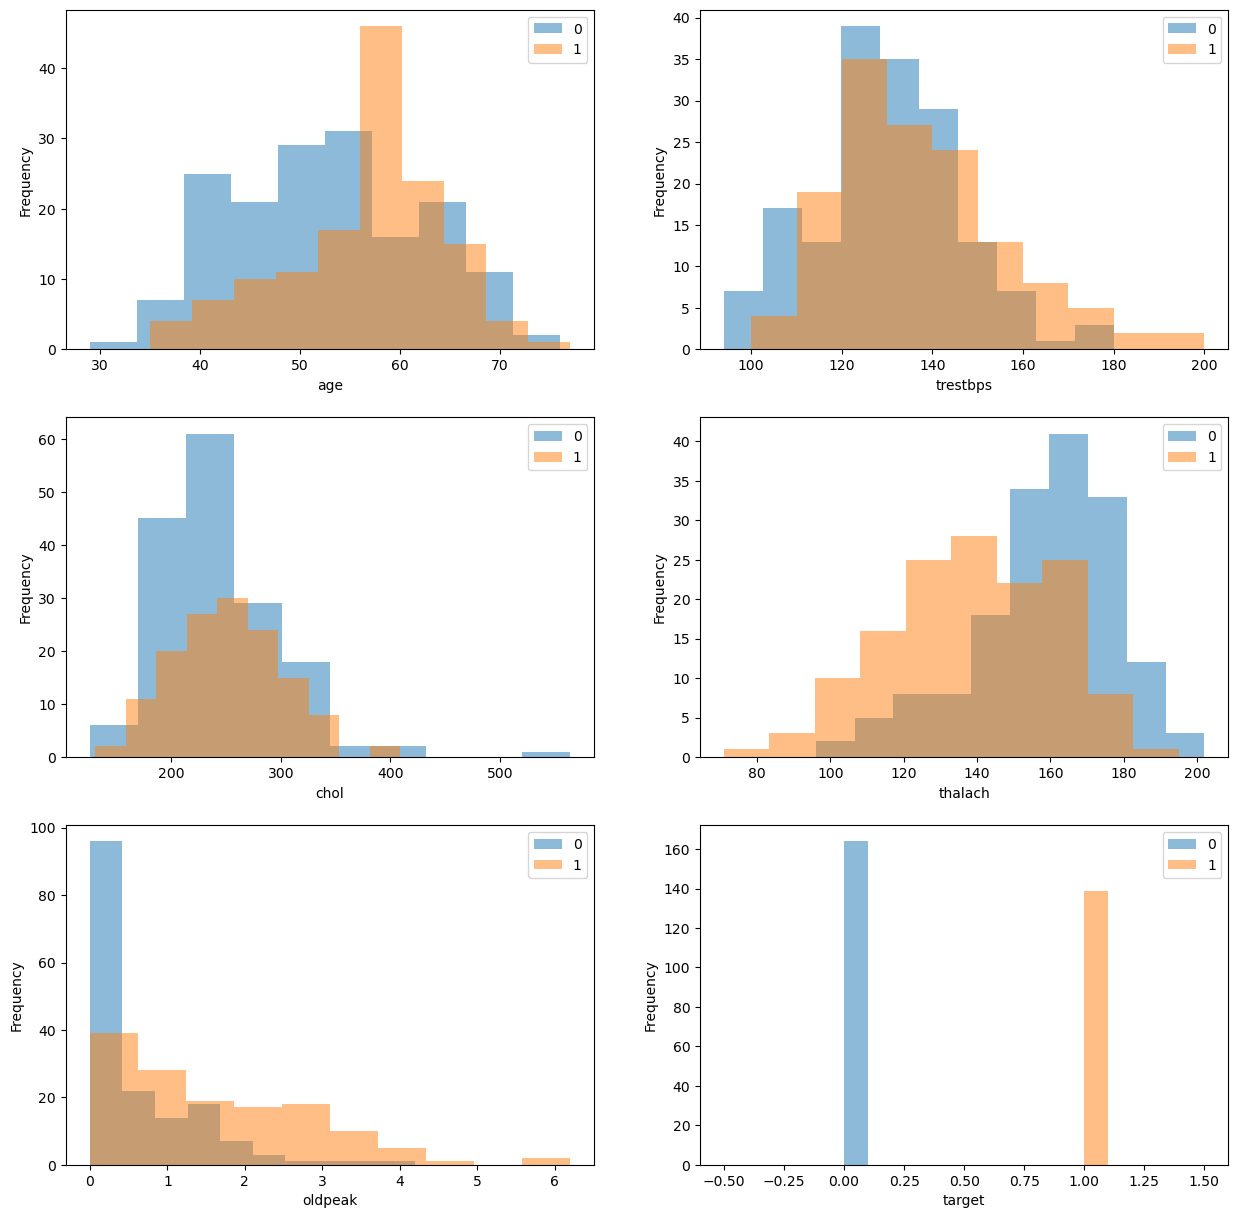

In [33]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for col, ax in zip(num_cols, axs.ravel()):
    data.groupby("target")[col].plot.hist(ax = ax, bins=10, alpha=0.5, legend=True
                                            )
    ax.set_xlabel(col)
plt.show()

From the histograms, we observed that higher age, lower maximum heart rate achieved (thalac) and higher ST depression induced by exercise relative to rest (oldpeak) seems to be more frequentl in the people with diagnosed heart disease. 


We also want to check the correlation between each numeric features to avoid colinearity. 

In [22]:
data[["age","trestbps","chol","thalach","oldpeak","target"]].corr().style.background_gradient()

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.284946,0.208950,-0.393806,0.203805,0.223120
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171,0.150825
chol,0.208950,0.130120,1.000000,-0.003432,0.046564,0.085164
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085,-0.417167
oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000,0.424510
target,0.223120,0.150825,0.085164,-0.417167,0.424510,1.000000


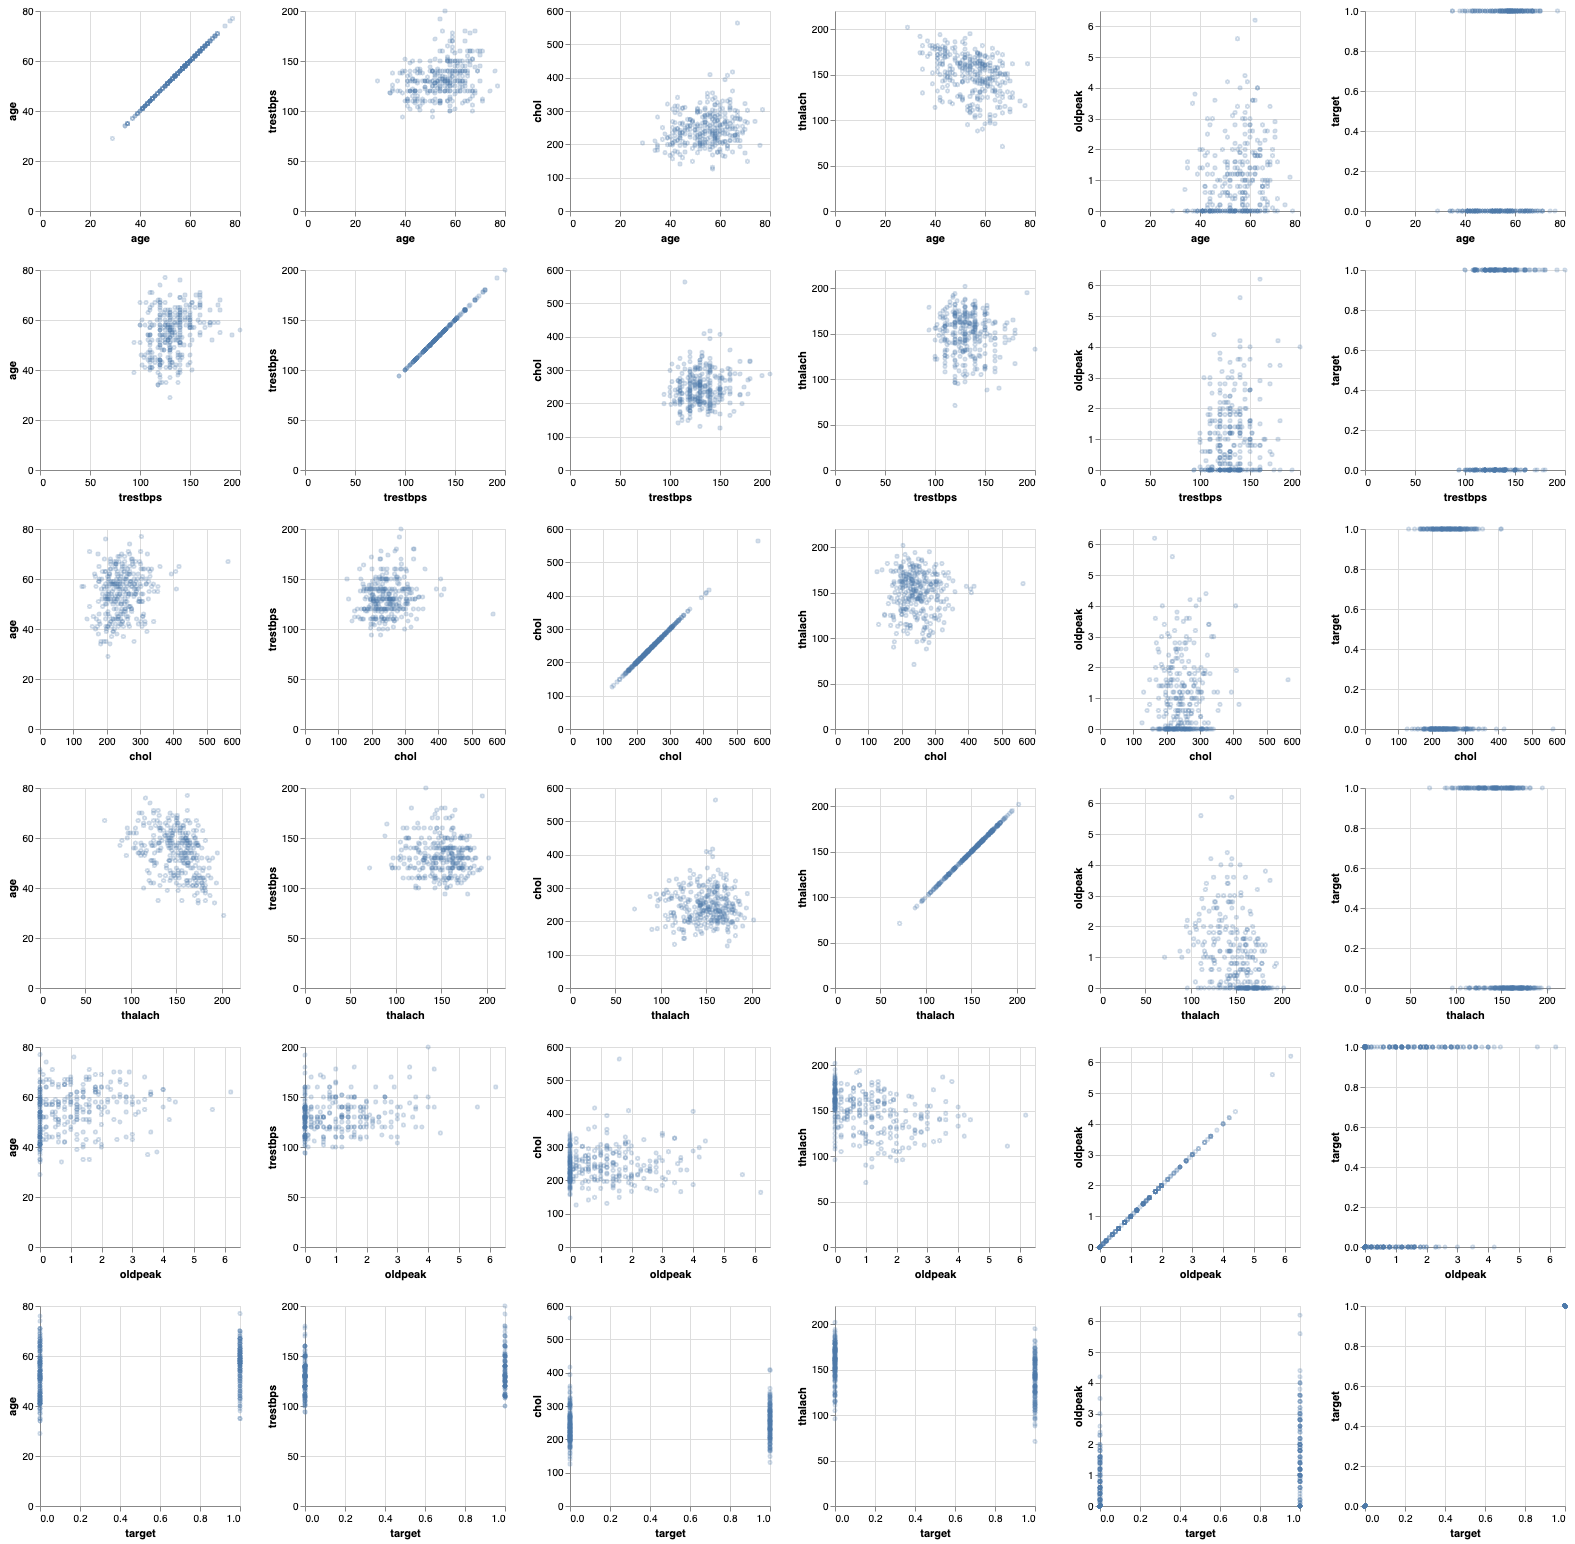

In [29]:
alt.Chart(data).mark_point(opacity=0.3, size=10).encode(
     alt.X(alt.repeat('row'), type='quantitative'),
     alt.Y(alt.repeat('column'), type='quantitative')
).properties(
    width=200,
    height=200
).repeat(
    column=["age","trestbps","chol","thalach","oldpeak","target"],
    row=["age","trestbps","chol","thalach","oldpeak","target"]
)

No strong correlation was found between the pairs of numeric features. There is a bit correlation between age and thalach (max heart rate achieved) that we may want to keep in mind in further analysis.


## Investigating categorical variables

The other variables are all categorical variables, thus we look at the count of each category among the two groups.

Findings:
- ca > 0 seems to be more likely to have heart disease
- cp = 4
- exang = 1 seems to be more likely to have heart disease
- sex = 1 seems to be more likely to have heart disease
- thal = 7 seems to be more likely to have heart disease



In [72]:
cat_cols = ['ca', 'cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'thal']
for col in cat_cols:
    print(pd.crosstab(data[col], data["target"], margins=True, margins_name='Grand Total'))
    print("-------")


target         0    1  Grand Total
ca                                
0.0          130   46          176
1.0           21   44           65
2.0            7   31           38
3.0            3   17           20
Grand Total  161  138          299
-------
target         0    1  Grand Total
cp                                
1.0           16    7           23
2.0           41    9           50
3.0           68   18           86
4.0           39  105          144
Grand Total  164  139          303
-------
target         0    1  Grand Total
exang                             
0.0          141   63          204
1.0           23   76           99
Grand Total  164  139          303
-------
target         0    1  Grand Total
fbs                               
0.0          141  117          258
1.0           23   22           45
Grand Total  164  139          303
-------
target         0    1  Grand Total
restecg                           
0.0           95   56          151
1.0            1    3  

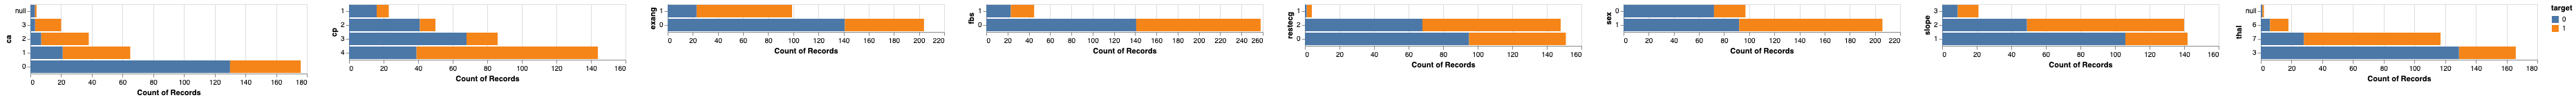

In [55]:
alt.Chart(data).mark_bar().encode(
     x='count()',
     y = alt.Y(alt.repeat('column'), type='nominal', sort='x'), 
    tooltip = 'count()',
     color='target:N').repeat(column=cat_cols)

In [74]:
# features1 = [
#     "age","trestbps","chol"
# ]
# features2 = [
#     "thalach","oldpeak"
# ]
# charts1=[]
# charts2=[]
# for feat in features1:
#     charts1.append(alt.Chart(data).mark_bar().encode(
#        x=feat,
#        y='count()',
#        color='target:N').properties(
#     width=300,
#     height=200
# ))
# for feat in features2:
#     charts2.append(alt.Chart(data).mark_bar().encode(
#        alt.X(feat, bin=alt.Bin(maxbins=20)),
#        y='count()',
#        color='target:N').properties(
#     width=300,
#     height=200
# ))
# alt.hconcat(*charts1) & alt.concat(*charts2)

For the simplicity of reading, we only show the categorical variables that is highly related to the probability below.

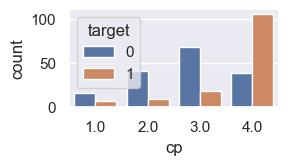

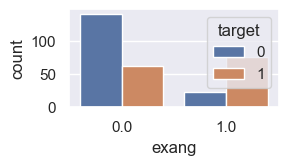

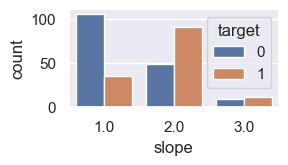

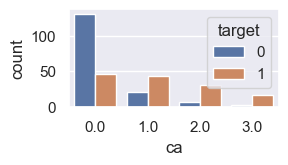

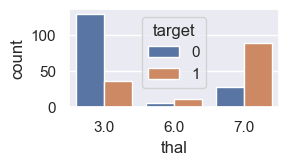

In [44]:
import seaborn as sns
sns.set(rc={'figure.figsize':(2.7,1.27)})
categorical_features = ["cp","exang","slope","ca","thal"]
for categorical_feature in categorical_features:
    sns.countplot(x =categorical_feature, hue = "target", data = data)
    plt.show()

## Results
- Among the numeric features, we will further analyze age, maximum heart rate achieved (thalac) and ST depression induced.
- Among the categorical features, we will further analyze if cp > 0, exang = 1, sex = 1, thal = 7 are associated with presence of heart disease.



## Reference  
1. Andras Janosi,William Steinbrunn,Matthias Pfisterer,Robert Detrano.UCI Machine Learning Repository Heart Disease Data Set.  
 https://archive.ics.uci.edu/ml/datasets/Heart+Disease
2. Center for Disease Control and Prevention.2021.Health Topics – Heart Disease and Heart Attack.  
 https://www.cdc.gov/policy/polaris/healthtopics/heartdisease/index.html    
3. Center for Disease Control and Prevention.2021.Heart Attack Symptoms, Risk, and Recovery. 
 https://www.cdc.gov/heartdisease/heart_attack.html    
4. de Jonge, Edwin. 2018. Docopt: Command-Line Interface Specification Language. https://CRAN.R-project.org/package=docopt.